# SEABORN

Seaborn es una biblioteca de visualización de datos en Python basada en matplotlib . Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.

Para una breve introducción a las ideas de como usar esta librería
[Introducción SEABORN](https://seaborn.pydata.org/introduction.html)


## Ejercico Seaborn 

En lo  que concierne al trabajo en ciencia de datos no siempre es necesario el uso de modelos de Machine Learning, hacer buenas visualizaciones que involucren las variables que se tienen son muy dicientes al momento de tomar decisiones.  En este ejercicio se propone estudiar la libreía Seaborn con la fuentes de información proveniente de Titanic y  hacer visualizaciones unidimensionales y bidimensionales qu epermitan comprender mejor la fuente. 

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
with open('train_1.csv') as f:
    titanic=pd.read_csv(f, delimiter=',')


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
sns.set_style("whitegrid")

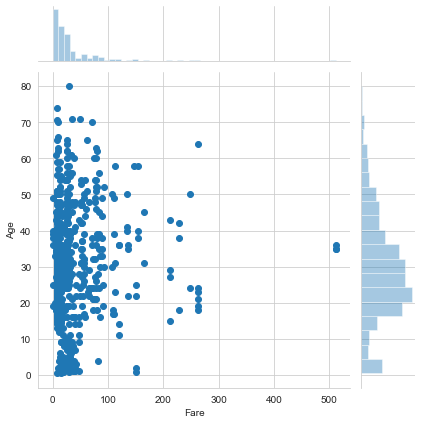

In [14]:
sns.jointplot(x='Fare', y = 'Age', data = titanic)

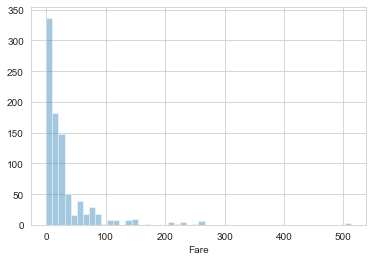

In [20]:
sns.distplot(titanic['Fare'], kde=False) # si quiero la curva quito kde

## Joint Plot

## Distribution Plot

## Box Plot

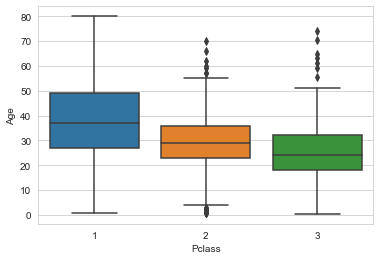

In [22]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

In [24]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Swarm Plot

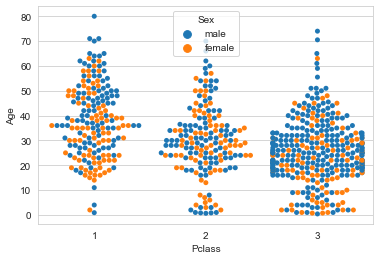

In [26]:
sns.swarmplot(x='Pclass', y= 'Age', data = titanic, hue = 'Sex')

## Count Plot

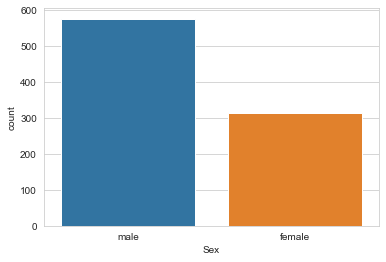

In [27]:
sns.countplot(x='Sex', data = titanic)

## Heat maps

In [30]:
tc = titanic.corr() ## las correlaciones son para las variables numericas

In [29]:
tc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'Gráfica de correlación')

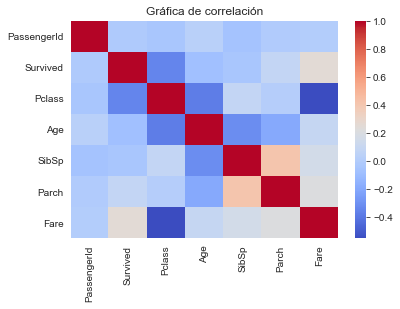

In [32]:
sns.heatmap(tc,cmap='coolwarm')
plt.title('Gráfica de correlación')

## Facet Grid

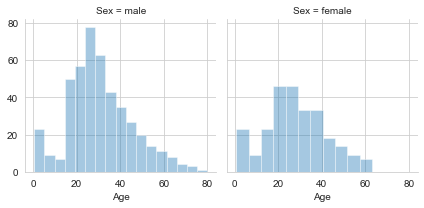

In [33]:
g = sns.FacetGrid(data = titanic, col = 'Sex')
g.map(sns.distplot, 'Age', kde = False)

In [34]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [38]:
titanic.fillna(0, inplace = True) ## una forma de hacer inputacion de datos

In [39]:
titanic['Survived'] = titanic['Survived'].map({0:'Died', 1: 'Survived'}) ## uso un diccionario .map

In [41]:
titanic.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

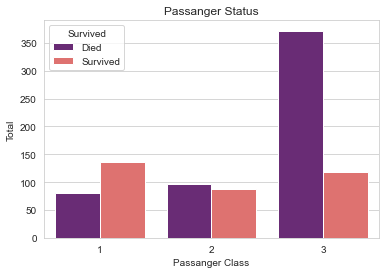

In [51]:
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic, palette = 'magma')
ax.set(title = 'Passanger Status', xlabel = 'Passanger Class', ylabel = 'Total')
plt.show() ## en palette puedo colocar Set1 

In [50]:
print(pd.crosstab(titanic['Sex'], titanic['Survived']))

Survived  Died  Survived
Sex                     
female      81       233
male       468       109


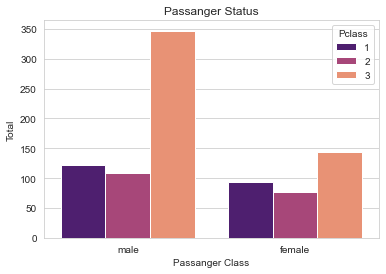

In [53]:
ax = sns.countplot(x = 'Sex', hue = 'Pclass', data = titanic, palette = 'magma')
ax.set(title = 'Passanger Status', xlabel = 'Passanger Class', ylabel = 'Total')
plt.show() ## en palette puedo colocar Set1 